In [63]:

%run utils.py

import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

# from sklearn.model_selection import train_test_split

# from scipy.ndimage import convolve, binary_fill_holes
# from scipy.stats import mode

# from skimage import io, exposure
# from skimage.color import rgb2gray
# from skimage.feature import canny
# from skimage.transform import rotate, hough_line, hough_line_peaks, resize
from skimage.filters import threshold_otsu, sobel, gaussian, threshold_local

from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



In [11]:
all_images,all_labels = load_images_and_augment()
X_train, X_val, X_test, y_train, y_val, y_test = train_test_validation_split(all_images,all_labels)

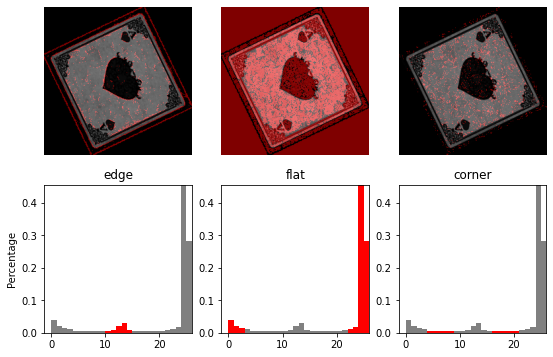

In [21]:
#example of an LBP representation of an image
# settings for LBP
radius = 3
n_points = 8 * radius
METHOD = 'uniform'


def overlay_labels(image, lbp, labels):
    mask = np.logical_or.reduce([lbp == each for each in labels])
    return label2rgb(mask, image=image, bg_label=0, alpha=0.5)


def highlight_bars(bars, indexes):
    for i in indexes:
        bars[i].set_facecolor('r')


image = X_train[0]
lbp = local_binary_pattern(image, n_points, radius, METHOD)


def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), density=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')


# plot histograms of LBP of textures
fig, (ax_img, ax_hist) = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
plt.gray()

titles = ('edge', 'flat', 'corner')
w = width = radius - 1
edge_labels = range(n_points // 2 - w, n_points // 2 + w + 1)
flat_labels = list(range(0, w + 1)) + list(range(n_points - w, n_points + 2))
i_14 = n_points // 4            # 1/4th of the histogram
i_34 = 3 * (n_points // 4)      # 3/4th of the histogram
corner_labels = (list(range(i_14 - w, i_14 + w + 1)) +
                 list(range(i_34 - w, i_34 + w + 1)))

label_sets = (edge_labels, flat_labels, corner_labels)

for ax, labels in zip(ax_img, label_sets):
    ax.imshow(overlay_labels(image, lbp, labels))

for ax, labels, name in zip(ax_hist, label_sets, titles):
    counts, _, bars = hist(ax, lbp)
    highlight_bars(bars, labels)
    ax.set_ylim(top=np.max(counts[:-1]))
    ax.set_xlim(right=n_points + 2)
    ax.set_title(name)

ax_hist[0].set_ylabel('Percentage')
for ax in ax_img:
    ax.axis('off')

In [23]:

# Define LBP parameters
radius = 3
n_points = 8 * radius

# Convert images to LBP features
X_train_lbp = [local_binary_pattern(image, n_points, radius, method='uniform') for image in X_train]
X_val_lbp = [local_binary_pattern(image, n_points, radius, method='uniform') for image in X_val]
X_test_lbp = [local_binary_pattern(image, n_points, radius, method='uniform') for image in X_test]

In [46]:
# Convert lists to NumPy arrays
X_train_lbp = np.array(X_train_lbp)
X_val_lbp = np.array(X_val_lbp)
X_test_lbp = np.array(X_test_lbp)

# Reshape the LBP feature arrays to 2-dimensional
X_train_flat = X_train_lbp.reshape(X_train_lbp.shape[0], -1)
X_val_flat = X_val_lbp.reshape(X_val_lbp.shape[0], -1)
X_test_flat = X_test_lbp.reshape(X_test_lbp.shape[0], -1)

In [47]:
# Create an instance of SVC
classifier = SVC()

# Train the SVC model
classifier.fit(X_train_flat, y_train)

# Predict labels for validation data
y_val_pred = classifier.predict(X_val_flat)

# Predict labels for test data
y_test_pred = classifier.predict(X_test_flat)

# Calculate accuracy scores
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.32503113325031135
Test Accuracy: 0.32503113325031135


In [58]:
pd.DataFrame(y_val_pred).value_counts()

spades      971
hearts      235
clubs       216
diamonds    184
dtype: int64

In [65]:
#Try to do LBP using edge detection of images 

# Convert images to sobel_binary_edge_img
X_train_sobel = [sobel(binarizing_image(image)) for image in X_train]
X_val_sobel = [sobel(binarizing_image(image))  for image in X_val]
X_test_sobel = [sobel(binarizing_image(image))  for image in X_test]

# Convert images to LBP features
X_train_sobel_lbp = [local_binary_pattern(image, n_points, radius, method='uniform') for image in X_train_sobel]
X_val_sobel_lbp = [local_binary_pattern(image, n_points, radius, method='uniform') for image in X_val_sobel]
X_test_sobel_lbp = [local_binary_pattern(image, n_points, radius, method='uniform') for image in X_test_sobel]

# Convert lists to NumPy arrays
X_train_sobel_lbp = np.array(X_train_sobel_lbp)
X_val_sobel_lbp = np.array(X_val_sobel_lbp)
X_test_sobel_lbp = np.array(X_test_sobel_lbp)

# Reshape the LBP feature arrays to 2-dimensional
X_train_sobel_flat = X_train_sobel_lbp.reshape(X_train_sobel_lbp.shape[0], -1)
X_val_sobel_flat = X_val_sobel_lbp.reshape(X_val_sobel_lbp.shape[0], -1)
X_test_sobel_flat = X_test_sobel_lbp.reshape(X_test_sobel_lbp.shape[0], -1)


In [66]:
# Create an instance of SVC
classifier = SVC()

# Train the SVC model
classifier.fit(X_train_sobel_flat, y_train)

# Predict labels for validation data
y_val_pred = classifier.predict(X_val_sobel_flat)

# Predict labels for test data
y_test_pred = classifier.predict(X_test_sobel_flat)

# Calculate accuracy scores
val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print the accuracy scores
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)

Validation Accuracy: 0.3866749688667497
Test Accuracy: 0.3804483188044832
